## Step 1: Setup the environemment:

Installation guide: https://sparkbyexamples.com/spark/apache-spark-installation-on-windows/

1. Install JAVA or java development kit:

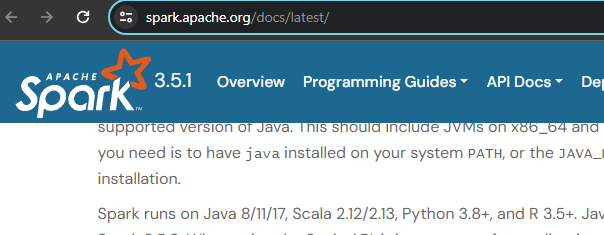

Choose either one to install: 
- Java: https://www.java.com/download/ie_manual.jsp
- Java development kit: https://www.oracle.com/hk/java/technologies/downloads/

Then verify Java has properly installed: 

In [1]:
!java -version

java version "22" 2024-03-19
Java(TM) SE Runtime Environment (build 22+36-2370)
Java HotSpot(TM) 64-Bit Server VM (build 22+36-2370, mixed mode, sharing)


2. Getting the Apache Spark installation pack
- Download latest `.tgz`: [Download Spark: spark-3.5.1-bin-hadoop3.tgz](https://spark.apache.org/downloads.html)
- Install Apache Spark, extract it 

3. Set spark environment variables

The easiest way would be go to "environment variable" and set them one by one.

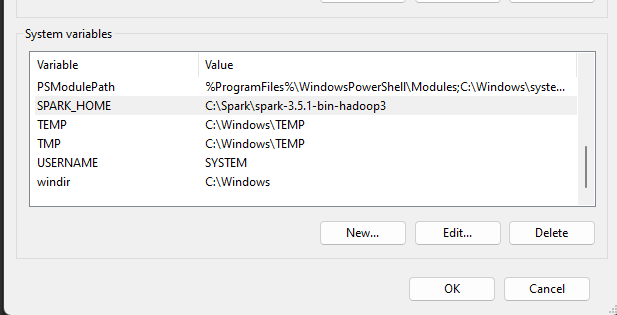

Locate extracted spark folder and put it as "spark_home" and "hadoop_home" in System variable. 

```shell
SPARK_HOME  = C:\Spark\spark-3.5.1-bin-hadoop3
HADOOP_HOME = C:\Spark\spark-3.5.1-bin-hadoop3
```

Next, set environment variable for pyspark:
```shell
PYSPARK_PYTHON = C:\Python310\python.exe
(Make sure this is pointing to an executable!)
```

Next, put the following two paths inside `path` variables: 
```shell
PATH=%SPARK_HOME%\bin;
PATH=%HADOOP_HOME%\bin;
```
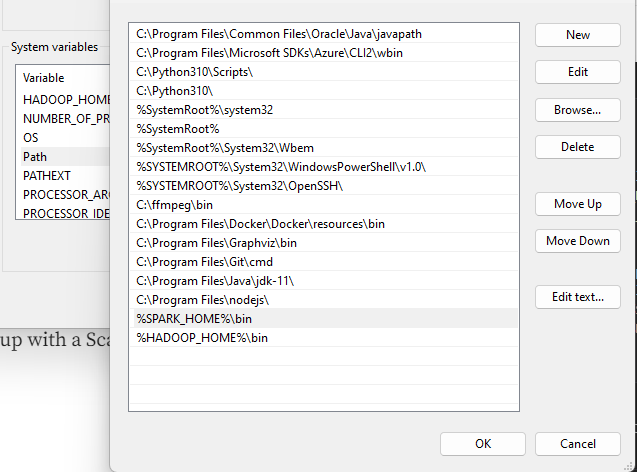

4. Including winsutils.exe into spark bin folder (only for windows PC)

- Without `winsutils.exe`, the software can be turned on in windows OS PC but there will be a warning message when using it. Because spark is developed on the base on Linux PC. 

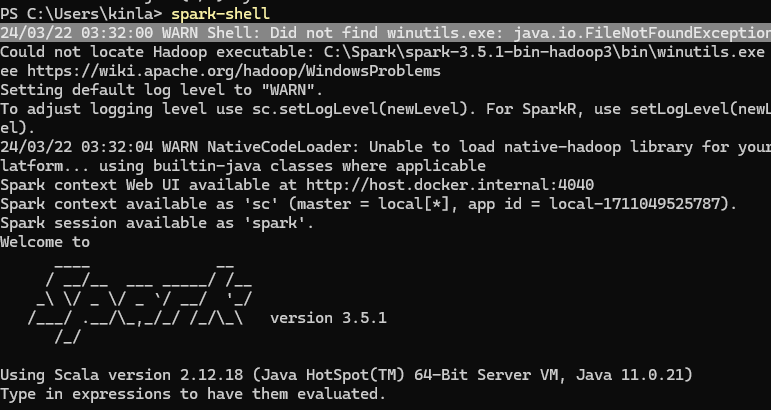

- We can find winutils in github: https://github.com/cdarlint/winutils
(Apache spark does not maintain this component, because they are NGO, while windows is complex, less developer using it, and also distributing software for Windows could potentially involve different licensing and legal considerations)

- Just copy `winutils.exe` from any hadoop version folder in these community repo, into `HADOOP_HOME` location that you have set. 

5. Testing spark shell. 

Finally, we test spark is properly installed in the computer. 

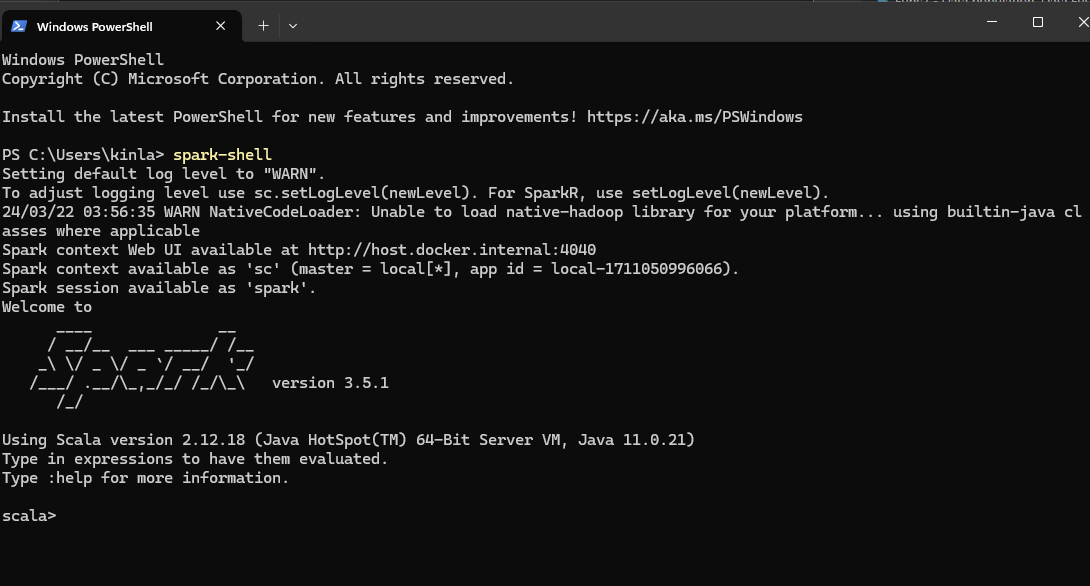

In [2]:
!spark-shell

^C


6. Testing running pyspark in jupyter notebook

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("My Spark Application") \
    .getOrCreate()

# Test the spark
df = spark.createDataFrame([{"Hello": "World"} for x in range(1000)])
df.show(5)

# Stop the session
spark.stop()

+-----+
|Hello|
+-----+
|World|
|World|
|World|
|World|
|World|
+-----+
only showing top 5 rows



7. Making sure within the python script, pyspark can find the location of python: 

In [1]:
!echo %PYSPARK_PYTHON%

C:\Python310\python.exe


In [2]:
import os

# make sure it is pointing to some `python.exe`!
print(os.getenv('PYSPARK_PYTHON'))

C:\Python310\python.exe


## How to read error message from Apache spark?
- Search for `caused-by` section in the error message: 

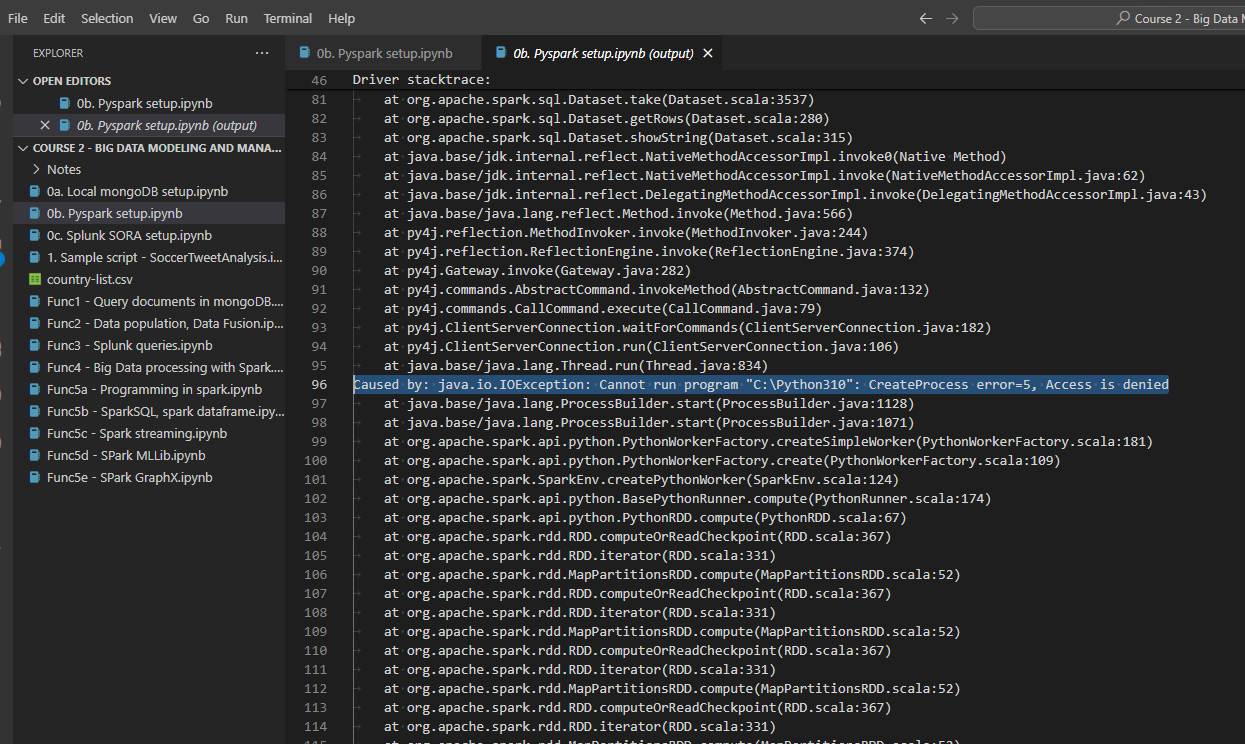

8. (For-copy) Using a testing module that check whether the current jupyter notebook or python script can run pyspark

In [3]:
import findspark
findspark.init()  # Initializes the PySpark environment

from pyspark.sql import SparkSession

# Attempt to create a SparkSession and interact with a simple DataFrame
def test_pyspark():
    # Build a SparkSession; getOrCreate will return an existing session if there is one
    spark = SparkSession.builder \
        .appName("PySparkTest") \
        .getOrCreate()
    
    # Create a simple DataFrame
    df_test = spark.createDataFrame([(1, 'Alice'), (2, 'Bob')], ['ID', 'Name'])
    
    # Perform a simple action to verify the DataFrame was created successfully
    df_test.show()
    
    # If the above commands run without error, PySpark is working
    print("PySpark is set up properly.")

    # Stop the SparkSession
    spark.stop()

# Run the test function
test_pyspark()

+---+-----+
| ID| Name|
+---+-----+
|  1|Alice|
|  2|  Bob|
+---+-----+

PySpark is set up properly.
